In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"D:\Project\spam.csv", encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#loading the data from csv file to a pandas dataframe
ds=pd.read_csv(r"D:\Project\spam.csv", encoding='latin-1')

ds

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
#replace the null values with a null string
sms_data=ds.where((pd.notnull(ds)),'')
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [7]:
#checking the number of rows and columns in the dataframe
sms_data.shape

(5572, 5)

In [8]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  5572 non-null   object
 3   Unnamed: 3  5572 non-null   object
 4   Unnamed: 4  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
sms_data.describe()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,5572,5572,5572
unique,2,5169,44,11,6
top,ham,"Sorry, I'll call later",,,
freq,4825,30,5522,5560,5566


In [10]:

sms_data.loc[sms_data['v1'] == 'spam', 'v1'] = 0



sms_data.loc[sms_data['v1']=='ham','v1',]=1


#separating the data as texts and label
X=sms_data['v2']
Y=sms_data['v1']


In [11]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [12]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

In [13]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2 ,random_state=3)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [14]:

#convert text data into (meaningful value) feature vectors that can be used as input to the logistic regression

feature_extraction=TfidfVectorizer(min_df=1,stop_words=['english'],lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

In [15]:
#convert Y_train and y_test value into integers
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')


In [17]:
print(X_train_features.shape)

(4457, 7775)


In [18]:
print(X_test_features)

  (0, 7719)	0.18177353326505832
  (0, 7528)	0.3065337254472181
  (0, 6199)	0.4854655760255235
  (0, 4428)	0.46634315006427723
  (0, 3645)	0.2366539368537363
  (0, 1586)	0.6031895330837128
  (1, 7719)	0.0680714933413295
  (1, 7461)	0.21219328500890222
  (1, 7425)	0.11457201769448462
  (1, 6804)	0.1376129736715364
  (1, 6784)	0.2515532326811641
  (1, 6501)	0.13930309431681578
  (1, 5681)	0.26383622694260933
  (1, 5524)	0.2515532326811641
  (1, 5427)	0.26383622694260933
  (1, 4993)	0.11009098573254651
  (1, 4173)	0.23055531529961845
  (1, 3475)	0.26383622694260933
  (1, 3403)	0.3432134171711547
  (1, 3359)	0.10236228487449013
  (1, 2990)	0.12752083197274744
  (1, 2943)	0.0966319945046976
  (1, 1615)	0.10952824030062666
  (1, 1592)	0.10030649242498009
  (1, 1279)	0.14720142914662773
  :	:
  (1113, 5987)	0.3792643940590298
  (1113, 4091)	0.3036313322736912
  (1113, 3766)	0.1827989161083793
  (1113, 3603)	0.21530402265168153
  (1113, 3359)	0.1914340903760714
  (1113, 3338)	0.3792643940590298

In [19]:

print(X_test_features.shape)

(1115, 7775)


In [20]:


model=LogisticRegression()


In [21]:

#training the logistic regression model with the training data
model.fit(X_train_features,Y_train)
     

LogisticRegression()

In [22]:

#prediction on training data
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)
     

In [23]:

print('Accuracy on training data:',accuracy_on_training_data)

Accuracy on training data: 0.9739735247924612


In [24]:

#prediction on testing data
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)


print('Accuracy on test data : ', accuracy_on_test_data)


Accuracy on test data :  0.9757847533632287


In [25]:
# Make predictions
predictions = model.predict(X_test_features)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)
classification_rep = classification_report(Y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
     

Accuracy: 0.9757847533632287
Confusion Matrix:
[[128  27]
 [  0 960]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90       155
           1       0.97      1.00      0.99       960

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.97      1115



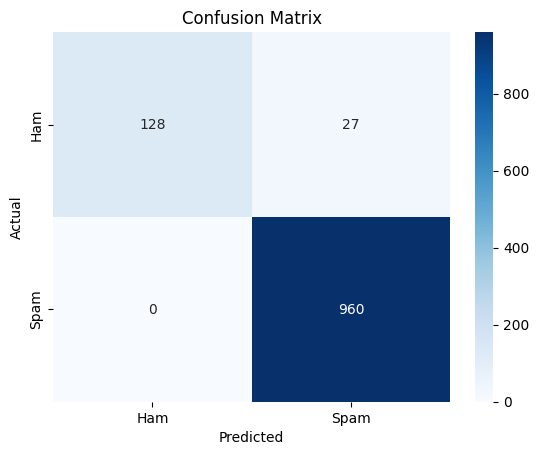

In [26]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:

input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv("D:\Project\spam.csv",encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2662,spam,Hello darling how are you today? I would love ...,NaN,NaN,NaN
4775,ham,Quite lor. But dun tell him wait he get compla...,NaN,NaN,NaN
3459,ham,I am back. Bit long cos of accident on a30. Ha...,NaN,NaN,NaN
4599,ham,Hi did u decide wot 2 get 4 his bday if not il...,NaN,NaN,NaN
1262,spam,"Hungry gay guys feeling hungry and up 4 it, no...",NaN,NaN,NaN


In [43]:
df=pd.concat([df['v1'],df['v2']],axis=1)

In [44]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class']=le.fit_transform(df['class'])
df['class'].value_counts()

0    4825
1     747
Name: class, dtype: int64

In [48]:
df=pd.concat([df['v1'],df['v2']],axis=1)
df.columns=['class','sms']
df.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
df_ham=df[df['class']==0]
df_spam=df[df['class']==1]
df_ham.head(),df_spam.head()

(   class                                                sms
 0      0  Go until jurong point, crazy.. Available only ...
 1      0                      Ok lar... Joking wif u oni...
 3      0  U dun say so early hor... U c already then say...
 4      0  Nah I don't think he goes to usf, he lives aro...
 6      0  Even my brother is not like to speak with me. ...,
     class                                                sms
 2       1  Free entry in 2 a wkly comp to win FA Cup fina...
 5       1  FreeMsg Hey there darling it's been 3 week's n...
 8       1  WINNER!! As a valued network customer you have...
 9       1  Had your mobile 11 months or more? U R entitle...
 11      1  SIX chances to win CASH! From 100 to 20,000 po...)

In [51]:
ham_text=" ".join(df_ham.sms)
spam_text=" ".join(df_spam.sms)

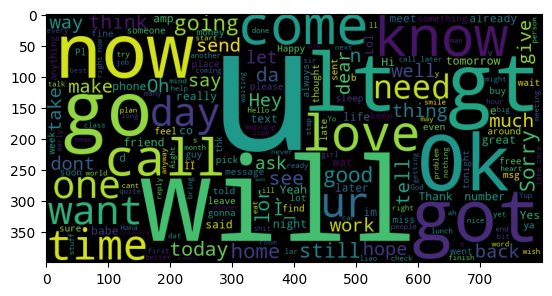

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(width=800, height=400).generate(ham_text)
plt.imshow(wc)

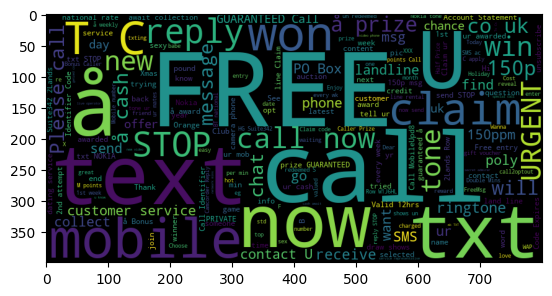

In [53]:
wc=WordCloud(width=800, height=400).generate(spam_text)
plt.imshow(wc)

In [54]:

df['class'].value_counts()

0    4825
1     747
Name: class, dtype: int64

<AxesSubplot: xlabel='class', ylabel='count'>

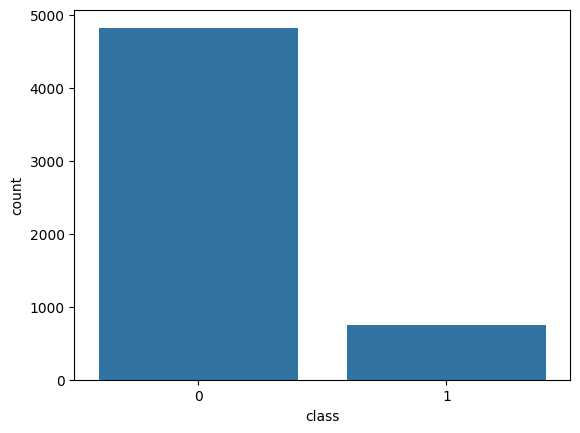

In [55]:
import seaborn as sns
sns.countplot(x=df['class'])